In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("data/zipfel_zapf1108.csv")
df_density = pd.read_csv('../density.csv')
df_post = pd.read_csv('../post-codes.csv')
zipfel = ['data/zipfel_zapf1108.csv','data/zipfel_zapf1115.csv','data/zipfel_zapf1122.csv','data/zipfel_zapf1129.csv']

In [2]:
# Salary Overview
salary_dict = {}
for s in df['Salary']:
    if s in salary_dict:
        salary_dict[s] += 1
    else:
        salary_dict[s] = 1
print(salary_dict)

{'Marktüblich': 33, '25-30 CHF': 2, '20-25 CHF': 8, '30-35 CHF': 3}


In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,Position,Freq,Salary,StartDate,Location,Days,City,Post Code
0,0,0,03.11.2023 NEW,Nanny,Regelmässig,Marktüblich,Januar 2024,Buchberg,"Mo-Do, ca. 29 - 35 Std./Woche, vorerst befrist...",Buchberg,8454
1,1,1,27.10.2023,Nanny,Regelmässig,Marktüblich,Januar 24,Kleinandelfingen - Zürich,1 Tag/ Woche,Kleinandelfingen,8451
2,2,2,25.10.2023,Nanny/leichte Haushaltsarbeiten,Regelmässig,Marktüblich,1.1.2024,Zürich - Zürich,2/11 pro Woche,Zürich,8000
3,3,3,15.08.2022,Babysitter,Regelmässig,Marktüblich,NaN,Zürich - Zürich,"2 afternoons per week, 2-3h",Zürich,8000
4,4,4,02.08.2022,Babysitter,Mehrmalig,Marktüblich,NaN,Zürich - Zürich,10 Stunden,Zürich,8000


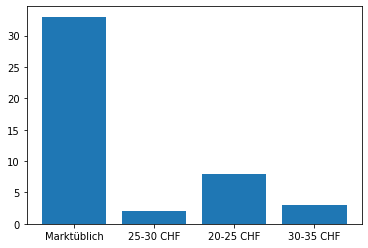

In [4]:
import numpy as np
import matplotlib.pyplot as plt
names = list(salary_dict.keys())
values = list(salary_dict.values())

plt.bar(range(len(salary_dict)), values, tick_label=names)
plt.show()

In [5]:
# Frequency Overview
freq_dict = {}
for f in df['Freq']:
    if f in freq_dict:
        freq_dict[f] += 1
    else:
        freq_dict[f] = 1
print(freq_dict)

{'Regelmässig': 39, 'Mehrmalig': 6, 'Einmalig': 1}


In [8]:
def city(row):
    l = row['Location'].split()
    return l[0]
        
df['City'] = df.apply(city, axis=1)

df = df.merge(df_post.drop_duplicates(['post_district']), right_on = 'post_district', left_on = 'City', how = 'inner')

df

,Unnamed: 0,Unnamed: 0.1,Date,Position,Freq,Salary,StartDate,Location,Days,City,...,lat_x,lng_x,Post Code,post_district_y,comment_y,country_code_y,region_y,town_y,lat_y,lng_y
0,0,0,03.11.2023 NEW,Nanny,Regelmässig,Marktüblich,Januar 2024,Buchberg,"Mo-Do, ca. 29 - 35 Std./Woche, vorerst befrist...",Buchberg,...,47.573250,8.562714,8454,Buchberg,NaN,CH,SH,Buchberg,47.573250,8.562714
1,1,1,27.10.2023,Nanny,Regelmässig,Marktüblich,Januar 24,Kleinandelfingen - Zürich,1 Tag/ Woche,Kleinandelfingen,...,47.608120,8.681052,8451,Kleinandelfingen,NaN,CH,ZH,Kleinandelfingen,47.608120,8.681052
2,2,2,25.10.2023,Nanny/leichte Haushaltsarbeiten,Regelmässig,Marktüblich,1.1.2024,Zürich - Zürich,2/11 pro Woche,Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
3,3,3,15.08.2022,Babysitter,Regelmässig,Marktüblich,NaN,Zürich - Zürich,"2 afternoons per week, 2-3h",Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
4,4,4,02.08.2022,Babysitter,Mehrmalig,Marktüblich,NaN,Zürich - Zürich,10 Stunden,Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
5,5,5,14.07.2022,Nanny,Regelmässig,Marktüblich,August,Zürich - Zürich,2 - 3 halbe Tage pro Woche,Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
6,6,6,06.07.2022,Nanny,Regelmässig,Marktüblich,August oder nach Vereinbarung,Zürich - Zürich,Mittwoch 07:30 - 19:30,Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
7,7,7,14.03.2022,Nanny,Mehrmalig,Marktüblich,Ab April möglich,Zürich - Zürich,8-16h pro Woche,Zürich,...,47.381813,8.535326,8000,Zürich,NaN,CH,ZH,Zürich,47.381813,8.535326
8,8,8,15.10.2023,Nanny,Regelmässig,Marktüblich,Februar/März 2024,Aarau - Aargau,1 Tag à ca 8-9 Stunden,Aarau,...,47.387958,8.044136,5000,Aarau,NaN,CH,AG,Aarau,47.387958,8.044136
9,9,9,06.10.2023,Nanny,Regelmässig,25-30 CHF,sofort,Schaffhausen - Schaffhausen,"Donnerstag, ~9 Stunden ab 7.45 Uhr",Schaffhausen,...,47.711418,8.626545,8200,Schaffhausen,NaN,CH,SH,Schaffhausen,47.711418,8.626545


In [9]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count.head()

,Post Code,Counts
0,2544,1
1,3672,1
2,4655,1
3,5000,1
4,5022,1


In [10]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per_capita'] = df['Counts']/df['Population']
# Define urban column
df['region'] = 'unknown'
df.loc[df['Density']<400, 'region'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'region'] = 'suburb'
df.loc[df['Density']>1500, 'region'] = 'urban'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,Unnamed: 0,City,Region,Area,Population,Density,gig_per_capita,region
0,2544,1,1589,NaN,Canton of Solothurn,12.200,4943.0,405.163934,0.000202,suburb
1,3672,1,1306,NaN,Canton of Bern,13.000,3211.0,247.000000,0.000311,rural
2,4655,1,1694,Rohr Solothurn,Canton of Solothurn,8.400,1263.0,150.357143,0.000792,rural
3,5000,1,1748,Aarau,Aargau,8.600,15484.0,1800.465116,0.000065,urban
4,5022,1,1753,NaN,Aargau,1.311,2684.0,2047.292143,0.000373,urban


In [11]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('region')['region'].count()
urban_count

region
rural     15
suburb    15
urban      6
Name: region, dtype: int64

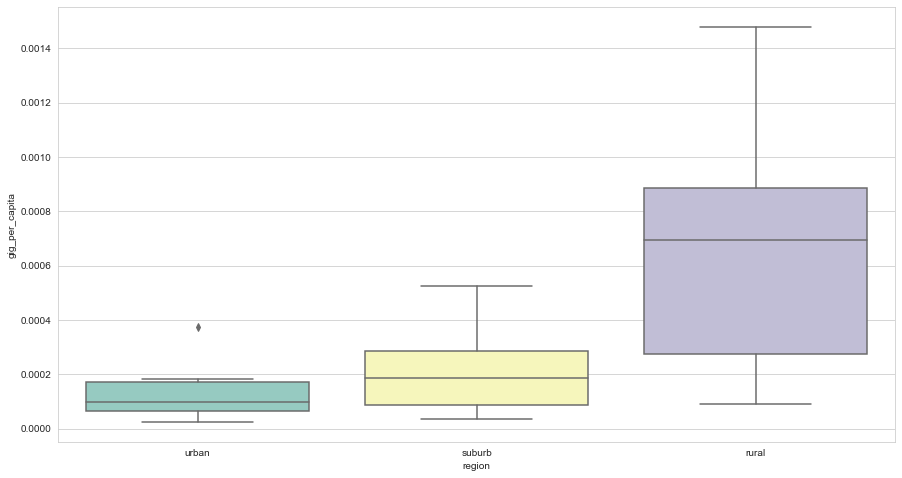

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region", y="gig_per_capita", data=df, palette="Set3",order = ['urban','suburb','rural'])

In [13]:
suburb = df[df["region"]=='suburb']['gig_per_capita']
urban = df[df["region"]=='urban']['gig_per_capita']
rural = df[df["region"]=='rural']['gig_per_capita']

In [14]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 15)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

In [15]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 17, label = labels, range = [0,0.00175])
    plt.xlabel('gig per capita')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

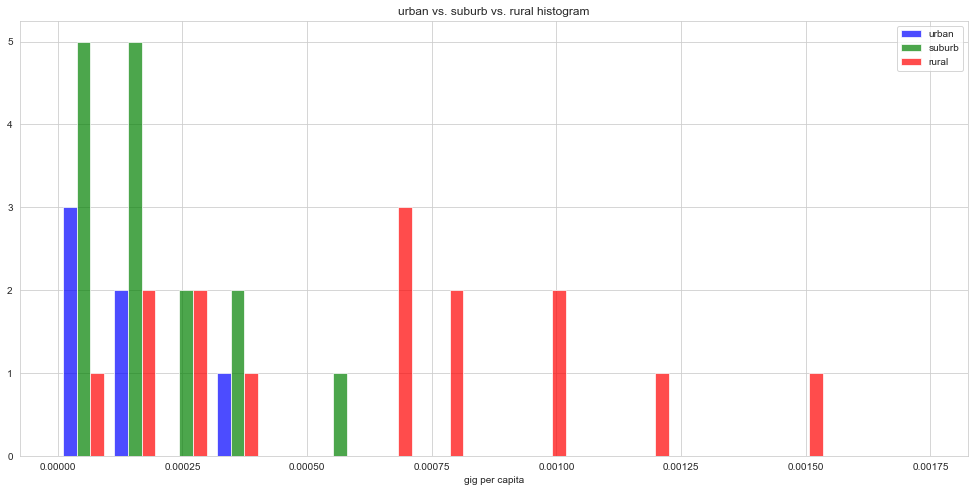

In [16]:
hist_all(['urban','suburb','rural'],urban,suburb,rural)

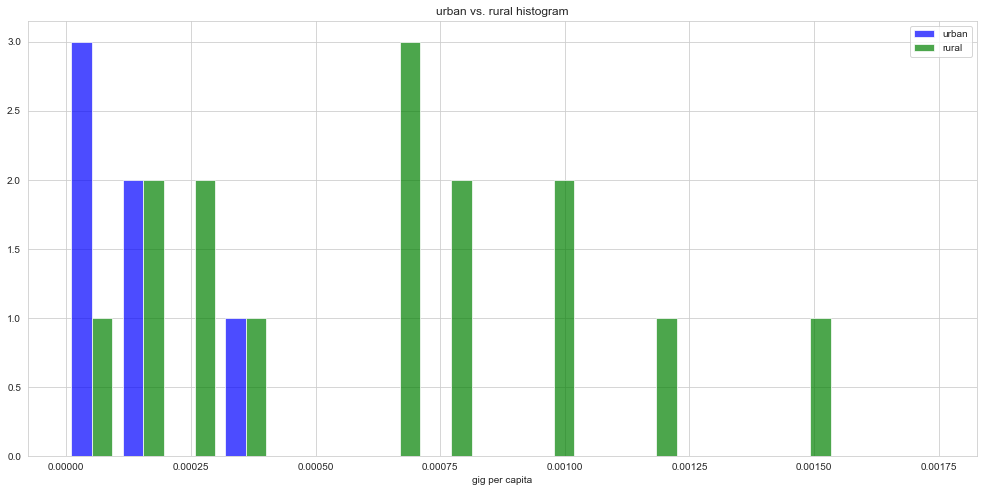

In [17]:
hist_all(['urban','rural'],urban,rural)

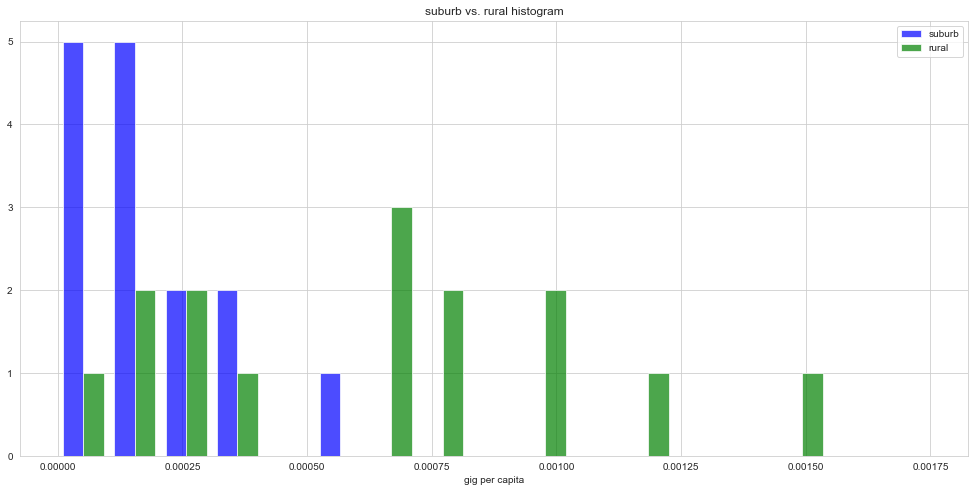

In [18]:
hist_all(['suburb','rural'],suburb,rural)

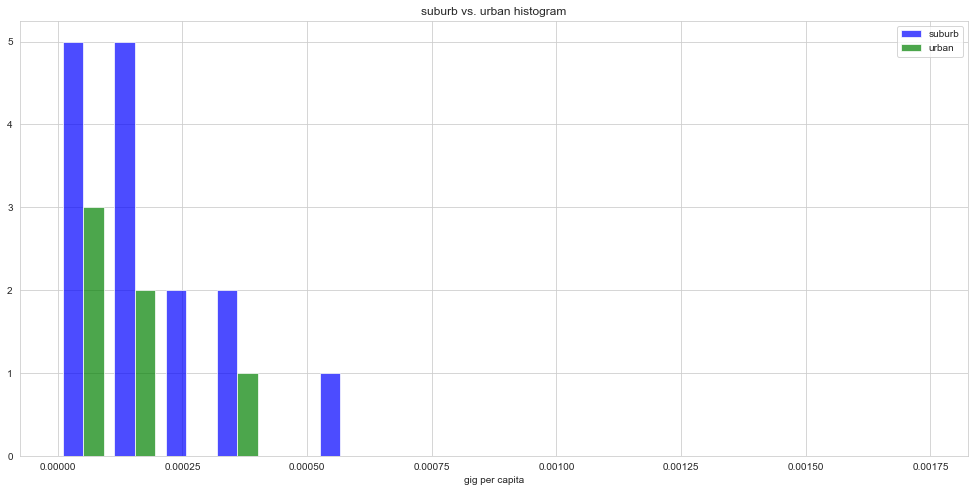

In [19]:
hist_all(['suburb','urban'],suburb,urban)

In [20]:
print(df_count.head())
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
print(df_count.head())
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per_capita'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

   Post Code  Counts
0       2544       1
1       3672       1
2       4655       1
3       5000       1
4       5022       1
   Unnamed: 0  Post Code      City Region    Area  Population       Density  \
0           0       1000  Lausanne   Vaud  14.100      4072.0    288.794326   
1           1       1001  Lausanne   Vaud     NaN         NaN           NaN   
2           2       1002  Lausanne   Vaud     NaN         NaN           NaN   
3           3       1003  Lausanne   Vaud   0.820      6707.0   8179.268293   
4           4       1004  Lausanne   Vaud   2.272     31230.0  13745.598592   

   Counts  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


,Unnamed: 0,Post Code,Area,Population,Density,gig_num,gig_per_capita
0,0,1000,14.100,4072.0,288.794326,0.0,0.0
3,3,1003,0.820,6707.0,8179.268293,0.0,0.0
4,4,1004,2.272,31230.0,13745.598592,0.0,0.0
5,5,1005,1.585,12386.0,7814.511041,0.0,0.0
6,6,1006,1.553,15391.0,9910.495815,0.0,0.0
...,...,...,...,...,...,...,...
3517,3517,9411,5.100,701.0,137.450980,0.0,0.0
3519,3519,9426,1.381,931.0,674.149167,0.0,0.0
3520,3520,9427,6.900,1846.0,267.536232,0.0,0.0
3521,3521,9428,7.000,1995.0,285.000000,0.0,0.0


In [21]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title('Zipfel Zapf')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('log(density)')
    ax.set_ylabel('log(gig_per_capita)')

In [25]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(np.log(df[col1].astype('float')), np.log(df[col2].astype('float')))
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')
    

pearson r: -0.7475167792576835, p value: 1.6196630396985336e-07
Spearman rho: -0.7392535392535393, p value: 2.609624873676629e-07
kendall tau: -0.5523809523809524, p value: 2.1364317542611214e-06


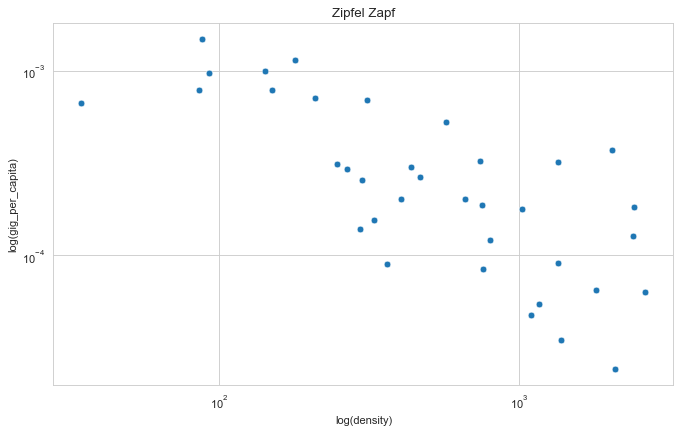

In [26]:
draw_corr(df,'Density','gig_per_capita')

pearson r: -0.0070060404635226, p value: 0.692939996370636
Spearman rho: 0.08280415235523378, p value: 2.940843001659114e-06
kendall tau: 0.06727866733861991, p value: 3.205101113845257e-06


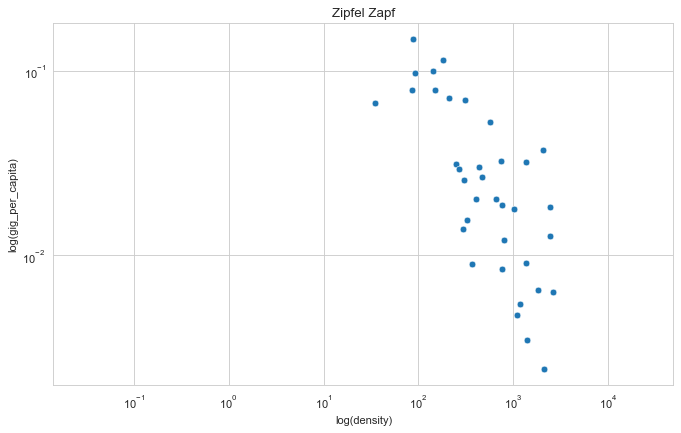

In [24]:
draw_corr(df_count,'Density','gig_per_capita')